In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

X = iris.data
Y = iris.target

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
from sklearn.svm import SVC

In [6]:
model = SVC()

In [7]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4)

In [25]:
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
from sklearn import metrics

In [27]:
predicted = model.predict(X_test)
expected = Y_test

In [28]:
print(metrics.accuracy_score(expected, predicted))

0.9333333333333333


In [29]:
from sklearn import svm

In [30]:
X = iris.data[:,:2]
Y = iris.target

In [31]:
C = 1.0

In [32]:
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [34]:
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [35]:
poly_svc = svm.SVC(kernel='poly',degree=3, C=C).fit(X,Y)

In [36]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

/home/cat/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [48]:
h = 0.02
x_min = X[:,0].min()-1
x_max = X[:,0].max()+1
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

In [52]:
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [53]:
titles=['SVC with linear kernel',
       'LinearSVC (linear kernel)',
       'SVC with RBF kernel',
       'SVC with polynomial (degree 3) kernel']

<ipython-input-56-fb5b30906404>:7: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)
<ipython-input-56-fb5b30906404>:7: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)
<ipython-input-56-fb5b30906404>:7: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)
<ipython-input-56-fb5b30906404>:7: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)


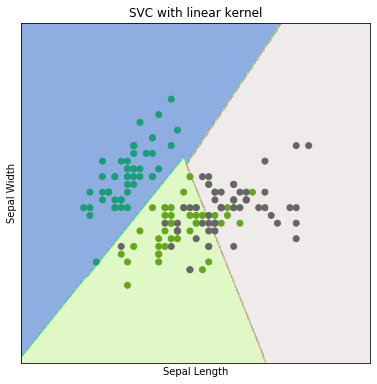

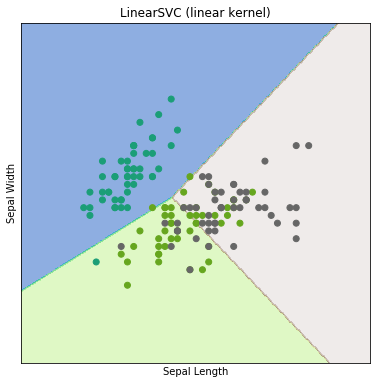

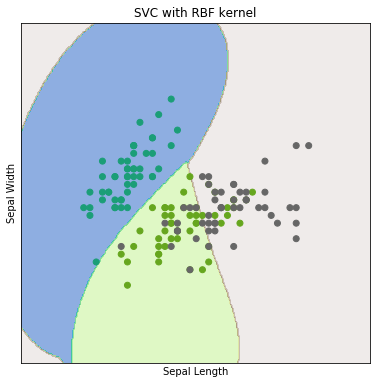

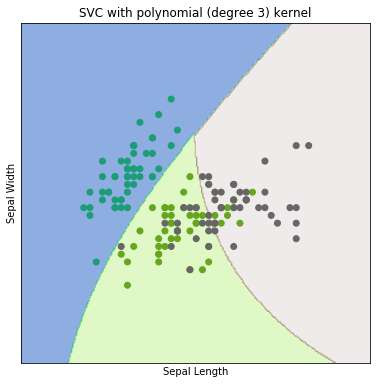

In [56]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])